# Breast Cancer Detection Model Ver01

## 0. Import Module

- [OpenSlide](https://openslide.org/api/python/#module-openslide)

In [41]:
%matplotlib inline
import os
import csv
import cv2
import openslide
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K

## 1. Data Load

In [17]:
# slide path
slide_path = '../data/train/16-S-042893_A1.mrxs'  # pos
# neg_slide_path = '../data/train/16-S-042725_A.mrxs'  # neg

# mask path
mask_path = '../data/train/Mask_16-S-042893_A1.png'  # pos
# neg_mask_path = '../data/train/Mask_16-S-042725_A.png'  # neg

# openslide
## slide
slide = openslide.open_slide(pos_slide_path)
# neg_slide = openslide.open_slide(neg_slide_path)
## mask
mask = openslide.open_slide(pos_mask_path)
# neg_mask = openslide.open_slide(neg_mask_path)

In [19]:
print('origin pos_slide.dimensions :', slide.dimensions)
# print('origin neg_slide.dimensions :', neg_slide.dimensions)
print('origin pos_mask.dimensions :', mask.dimensions)
# print('origin neg_mask.dimensions :', neg_mask.dimensions)

origin pos_slide.dimensions : (93970, 234042)
origin pos_mask.dimensions : (5316, 10007)


In [22]:
print("pos_slide's num of levels :", slide.level_count)
print("pos_slide's shape of levels :")
for level, dim in enumerate(slide.level_dimensions):
    print("level {} : {}".format(level, dim))

pos_slide's num of levels : 10
pos_slide's shape of levels :
level 0 : (93970, 234042)
level 1 : (46985, 117021)
level 2 : (23492, 58510)
level 3 : (11746, 29255)
level 4 : (5873, 14627)
level 5 : (2936, 7313)
level 6 : (1468, 3656)
level 7 : (734, 1828)
level 8 : (367, 914)
level 9 : (183, 457)


## 2. Fit Data Shape

In [36]:
# Path size
PATCH_SIZE = 256

# min x,y offset
min_x, min_y = (7744, 39056)
location = (int(min_x), int(min_y))

# size x, y
size = (int(mask.dimensions[0]/16), int(mask.dimensions[1]/16))

# level
level = int(np.log2(PATCH_SIZE))

# read region
slide_lv4 = slide.read_region(location, level, size)

# thumbnail mask
thumbnail_mask = mask.get_thumbnail(size)  # (332, 625)

In [40]:
print('slide_lv4.size :', slide_lv4.size)
print('thumbnail_mask.size :', thumbnail_mask.size)

slide_lv4.size : (332, 625)
thumbnail_mask.size : (332, 624)


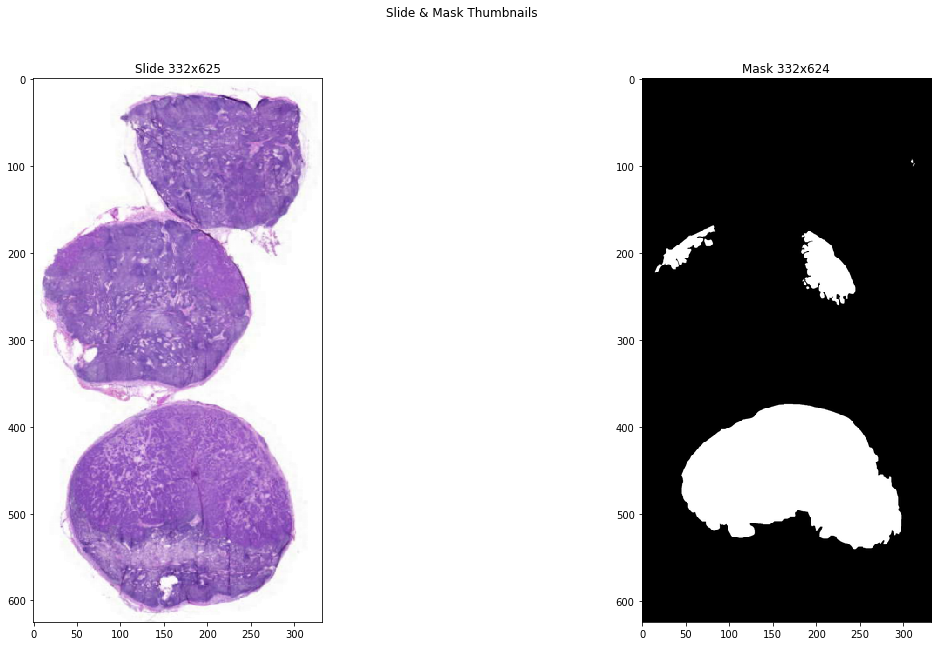

In [43]:
## Plotting
f, axes = plt.subplots(1, 2, figsize=(20, 10));
ax = axes.ravel()
ax[0].imshow(slide_lv4);
ax[0].set_title('Slide %dx%d' % slide_lv4.size)
ax[1].imshow(thumbnail_mask.convert('L'), cmap='gray');
ax[1].set_title('Mask %dx%d' % thumbnail_mask.size)
f.suptitle('Slide & Mask Thumbnails ');